In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import geopandas as gpd
import heapq
import random
import timeit

import sys
sys.path.append('./../exploration') # this is where the magic is going down
sys.path.append('./..')

from intersections_and_roads import *
from search import *
%matplotlib inline

In [2]:
# Read in the geolocation data
intersections = gpd.read_file('../cambridgegis_data_trans/Intersections/TRANS_Intersections.topojson')
street_centerline = gpd.read_file('../cambridgegis_data_trans/Street_Centerlines/TRANS_Centerlines.topojson')
intersection_graph, connection_dict = build_intersection_graph(intersections=intersections, street_centerline=street_centerline)

In [3]:
## add costs of streets to connection_dic:

bike_accidents = pd.read_csv('./../exploration/bicycle_crashes.csv')
bike_crashes_per_street = bike_accidents.groupby(['Street_ID'], as_index=False).size().reset_index()
bike_crashes_per_street.rename(index=str, inplace=True, columns={0: 'num_accidents'})

In [4]:
bike_crashes_per_street.head()

,Street_ID,num_accidents
0,Aberdee_Ave_1,2
1,Aberdee_Ave_2,1
2,Albany_St_1,1
3,Albany_St_2,2
4,Albany_St_4,8


In [5]:
# add num accidents to each street id
for street in bike_crashes_per_street.itertuples():
    if connection_dict.get(street[1], None):
        connection_dict[street[1]].add_accidents(street[2])

In [6]:
# randomly select a start and an end point on the graph for test
start = intersection_graph[np.random.choice(intersection_graph.keys())]
end = intersection_graph[np.random.choice(intersection_graph.keys())]


In [7]:
# search the graph
route = a_star_search(start, end, intersection_graph, connection_dict, get_road_cost)
safe_route = a_star_search(start, end, intersection_graph, connection_dict, get_safe_road_cost)

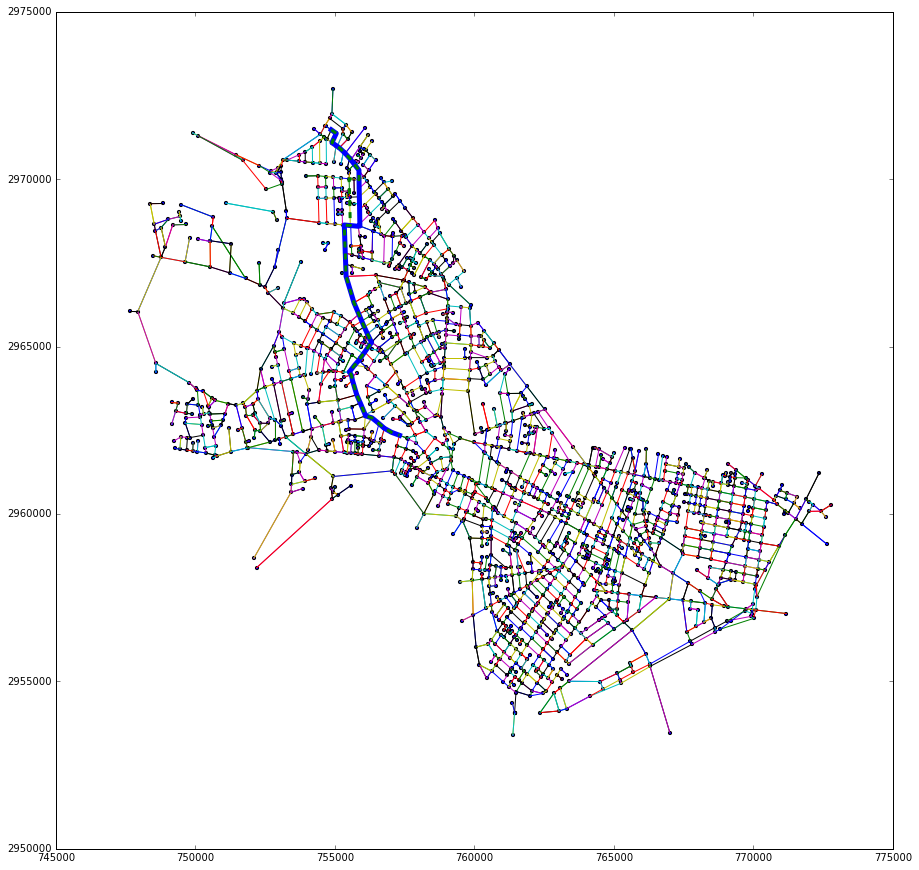

In [8]:
plot_graph(intersection_graph, connection_dict, [route['nodes']], [safe_route['nodes']])

In [16]:
p1 = intersection_graph[np.random.choice(intersection_graph.keys())]
p2 = intersection_graph[np.random.choice(intersection_graph.keys())]
p3 = intersection_graph[np.random.choice(intersection_graph.keys())]
p4 = intersection_graph[np.random.choice(intersection_graph.keys())]

centroid = simulated_annealing_b(intersection_graph,
                                 connection_dict,
                                 get_road_cost,
                                 null_heuristic,
                                 starting_points=[p1,p2,p3])

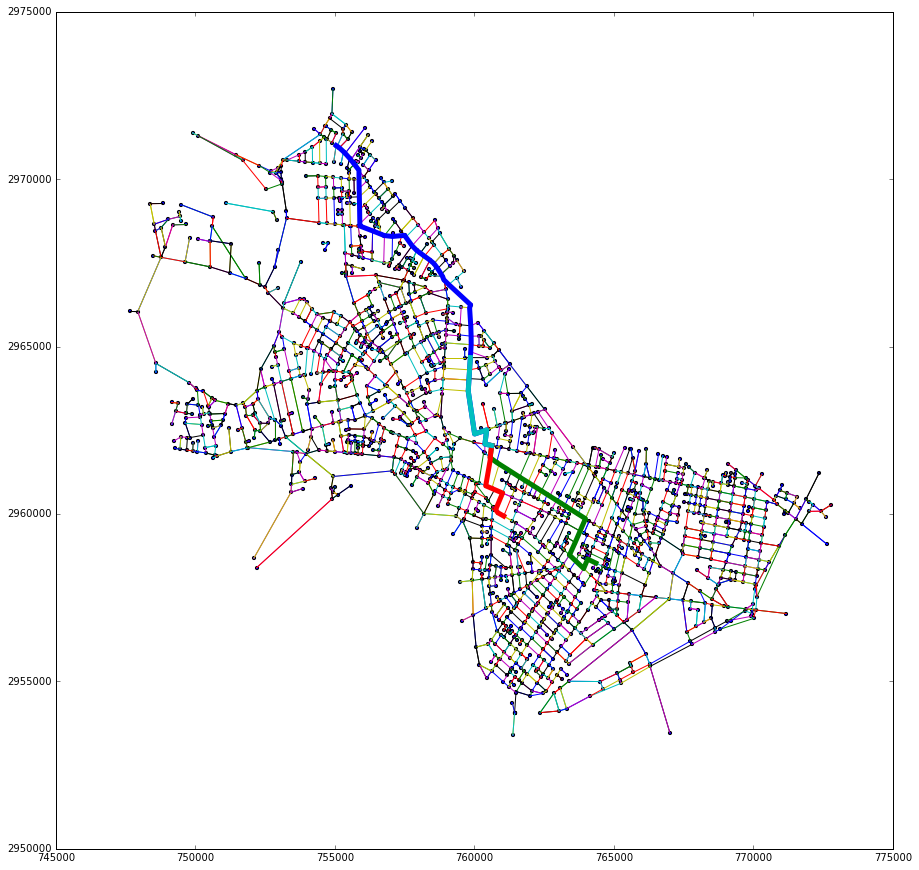

In [17]:
routes = []
connections = []
# fig, ax = plt.subplots(1,1, figsize=(15, 15))
for start in [p1,p2,p3,p4]:
    route = a_star_search(start, centroid, intersection_graph, connection_dict, get_road_cost)
    routes.append(route['nodes'])
    connections.append(route['connections'])

plot_graph(intersection_graph, connection_dict, routes, [])

In [ ]:
# timing for comparing heuristics down the line
def test():
#     start = intersection_graph[np.random.choice(intersection_graph.keys())]
#     end = intersection_graph[np.random.choice(intersection_graph.keys())]
    a_star_search(start, end, intersection_graph)

timeit.timeit("test()", setup="from __main__ import *", number=10)